In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Provide the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/xdr_data.csv'

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [30]:
# Top 10 handsets
handset_counts = data['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:\n", handset_counts)


Top 10 Handsets:
 Handset Type
Apple iPhone 6S (A1688)         4333
Apple iPhone 6 (A1586)          3669
undefined                       2987
Apple iPhone 7 (A1778)          2547
Apple iPhone Se (A1723)         2483
Apple iPhone 8 (A1905)          2105
Apple iPhone Xr (A2105)         1826
Samsung Galaxy S8 (Sm-G950F)    1678
Apple iPhone X (A1901)          1486
Samsung Galaxy J3 (Sm-J330)     1481
Name: count, dtype: int64


In [31]:
# Top 3 handset manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Manufacturers:\n", top_3_manufacturers)


Top 3 Manufacturers:
 Handset Manufacturer
Apple      24430
Samsung    13353
Huawei      4312
Name: count, dtype: int64


In [32]:
# Top 5 handsets per top 3 manufacturers
top_5_handsets = data[data['Handset Manufacturer'].isin(top_3_manufacturers.index)]
top_5_handsets_per_manufacturer = top_5_handsets.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
print("Top 5 Handsets per Manufacturer:\n", top_5_handsets_per_manufacturer)


Top 5 Handsets per Manufacturer:
 Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)           4333
                      Apple iPhone 6 (A1586)            3669
                      Apple iPhone 7 (A1778)            2547
                      Apple iPhone Se (A1723)           2483
                      Apple iPhone 8 (A1905)            2105
Huawei                Huawei P20 Lite Huawei Nova 3E     850
                      Huawei P20                         604
                      Huawei Y6 2018                     398
                      Huawei Fig-Lx1                     385
                      Huawei P20 Pro                     357
Samsung               Samsung Galaxy S8 (Sm-G950F)      1678
                      Samsung Galaxy J3 (Sm-J330)       1481
                      Samsung Galaxy A5 Sm-A520F        1437
                      Samsung Galaxy S7 (Sm-G930X)      1199
                      Samsung Galaxy J5 (Sm-J530)        97

In [33]:
# Task 1.1 - User Behavior Aggregation
user_data = data.groupby('IMEI').agg(
    number_of_sessions=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_download_data=('Total DL (Bytes)', 'sum'),
    total_upload_data=('Total UL (Bytes)', 'sum'),
    social_media_DL=('Social Media DL (Bytes)', 'sum'),
    social_media_UL=('Social Media UL (Bytes)', 'sum'),
    google_DL=('Google DL (Bytes)', 'sum'),
    google_UL=('Google UL (Bytes)', 'sum'),
    youtube_DL=('Youtube DL (Bytes)', 'sum'),
    youtube_UL=('Youtube UL (Bytes)', 'sum'),
    netflix_DL=('Netflix DL (Bytes)', 'sum'),
    netflix_UL=('Netflix UL (Bytes)', 'sum'),
    gaming_DL=('Gaming DL (Bytes)', 'sum'),
    gaming_UL=('Gaming UL (Bytes)', 'sum')
).reset_index()


In [34]:
# Calculate Total Data Volume and Average Speeds
user_data['total_data_volume'] = user_data['total_download_data'] + user_data['total_upload_data']
user_data['average_DL_speed'] = user_data['total_download_data'] / user_data['total_duration']
user_data['average_UL_speed'] = user_data['total_upload_data'] / user_data['total_duration']


In [35]:
# Total data volume per application
user_data['total_social_media'] = user_data['social_media_DL'] + user_data['social_media_UL']
user_data['total_google'] = user_data['google_DL'] + user_data['google_UL']
user_data['total_youtube'] = user_data['youtube_DL'] + user_data['youtube_UL']
user_data['total_netflix'] = user_data['netflix_DL'] + user_data['netflix_UL']
user_data['total_gaming'] = user_data['gaming_DL'] + user_data['gaming_UL']


In [36]:
# Task 1.2 - Exploratory Data Analysis (EDA)
# Handling Missing Values
user_data.fillna(user_data.mean(), inplace=True)


In [37]:
# Decile Segmentation based on Duration
user_data['duration_decile'] = pd.qcut(user_data['total_duration'], 10, labels=False)


In [38]:
# Decile Summary
decile_summary = user_data.groupby('duration_decile').agg(
    total_data_volume=('total_data_volume', 'sum')
)
print("Total Data per Decile:\n", decile_summary)


Total Data per Decile:
                  total_data_volume
duration_decile                   
0                     1.996176e+12
1                     2.002496e+12
2                     1.993202e+12
3                     1.980249e+12
4                     2.030127e+12
5                     2.024834e+12
6                     2.062545e+12
7                     2.121966e+12
8                     2.398732e+12
9                     3.870044e+12


In [39]:
# Univariate Analysis (Non-Graphical)
summary_stats = user_data.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                IMEI  number_of_sessions  total_duration  total_download_data  \
count  3.949600e+04        39496.000000    3.949600e+04         3.949600e+04   
mean   4.176119e+13            1.147686    1.271188e+05         5.220733e+08   
std    1.668740e+13            0.461275    7.558579e+04         3.346733e+08   
min    1.254301e+12            1.000000    7.426000e+03         9.199518e+06   
25%    3.540711e+13            1.000000    8.473325e+04         2.700521e+08   
50%    3.566051e+13            1.000000    1.134310e+05         5.038646e+08   
75%    3.589521e+13            1.000000    1.626672e+05         7.266009e+08   
max    9.900120e+13           44.000000    4.072396e+06         2.009133e+10   

       total_upload_data  social_media_DL  social_media_UL     google_DL  \
count       3.949600e+04     3.949600e+04     3.949600e+04  3.949600e+04   
mean        4.710761e+07     2.057068e+06     3.777625e+04  6.600264e+06   
std         2.221338e+07     1

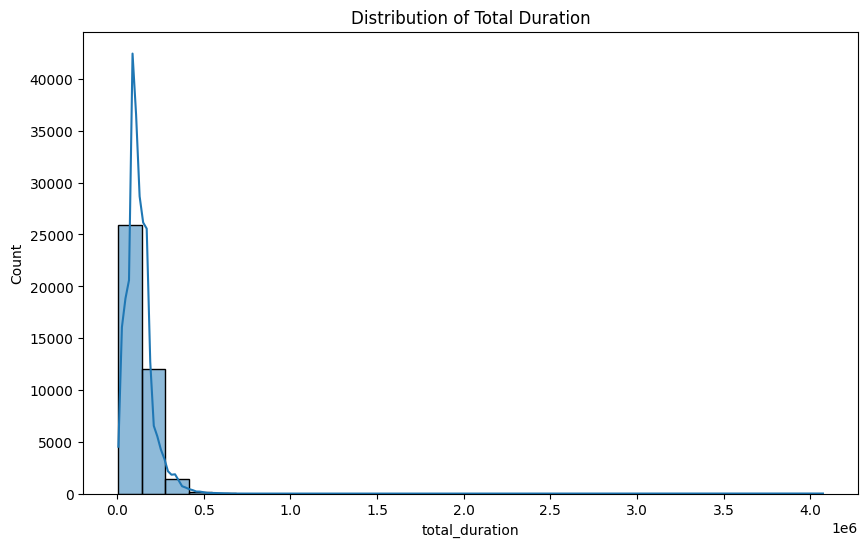

In [40]:
# Graphical Analysis
plt.figure(figsize=(10, 6))
sns.histplot(user_data['total_duration'], bins=30, kde=True)
plt.title('Distribution of Total Duration')
plt.show()

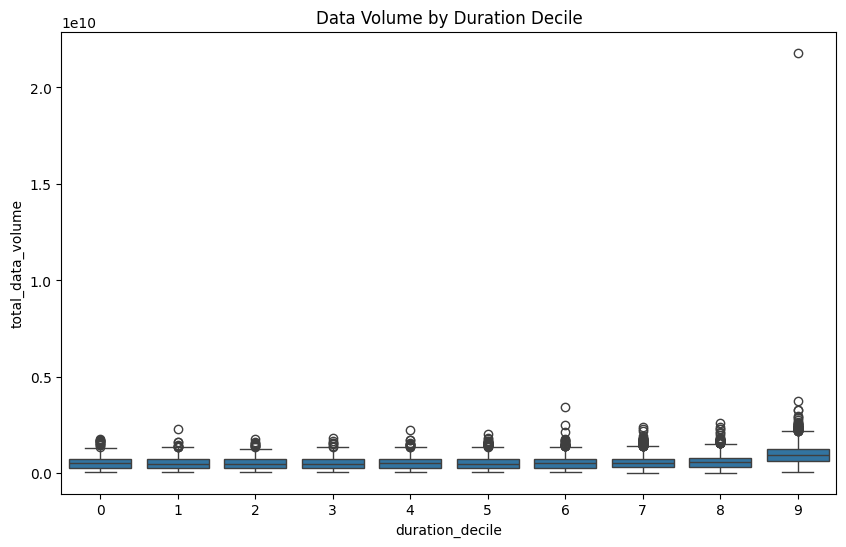

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration_decile', y='total_data_volume', data=user_data)
plt.title('Data Volume by Duration Decile')
plt.show()

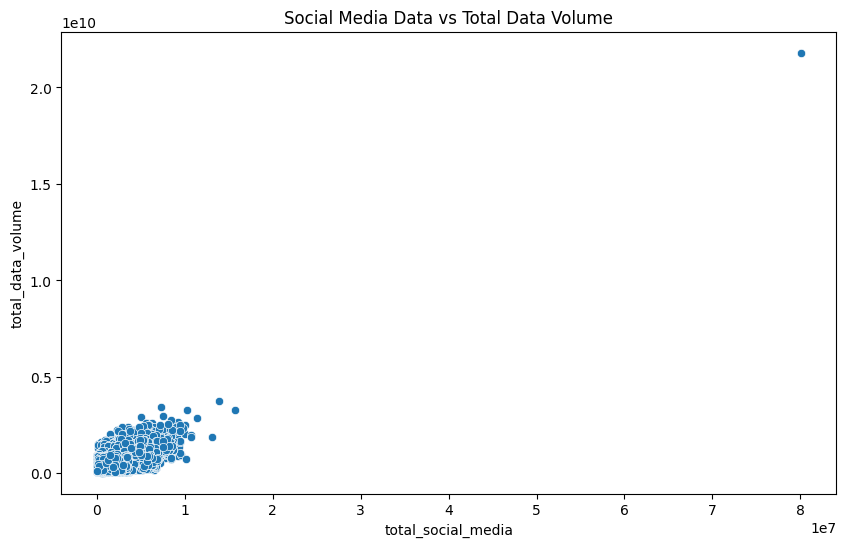

In [42]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_social_media', y='total_data_volume', data=user_data)
plt.title('Social Media Data vs Total Data Volume')
plt.show()


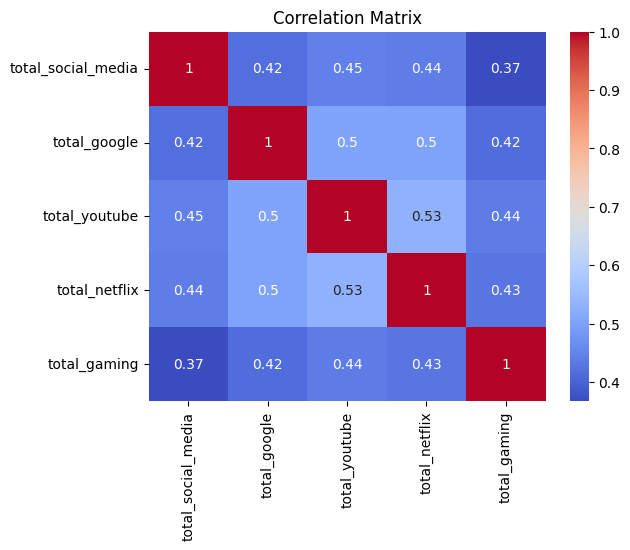

In [43]:
# Correlation Analysis
correlation_matrix = user_data[['total_social_media', 'total_google', 'total_youtube', 'total_netflix', 'total_gaming']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


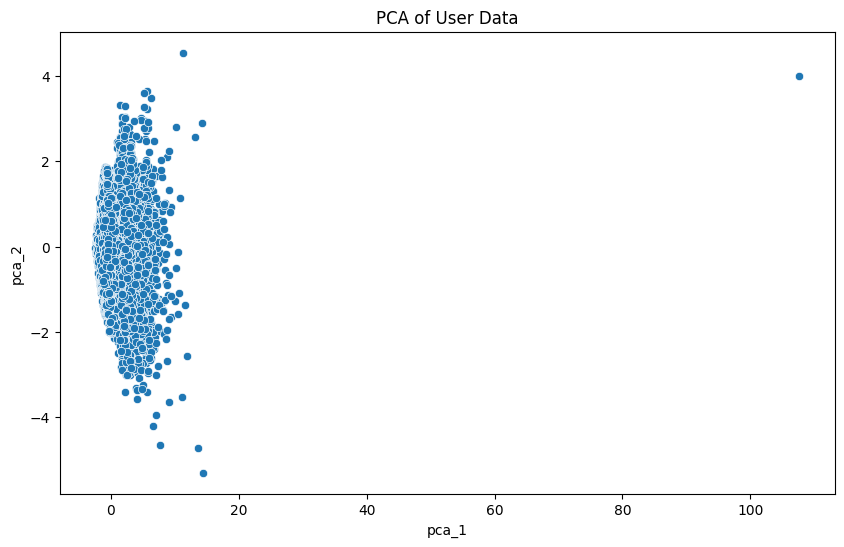

In [44]:
# Principal Component Analysis (PCA)
features = user_data[['total_download_data', 'total_upload_data', 'total_duration']]
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

user_data['pca_1'] = pca_result[:, 0]
user_data['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', data=user_data)
plt.title('PCA of User Data')
plt.show()